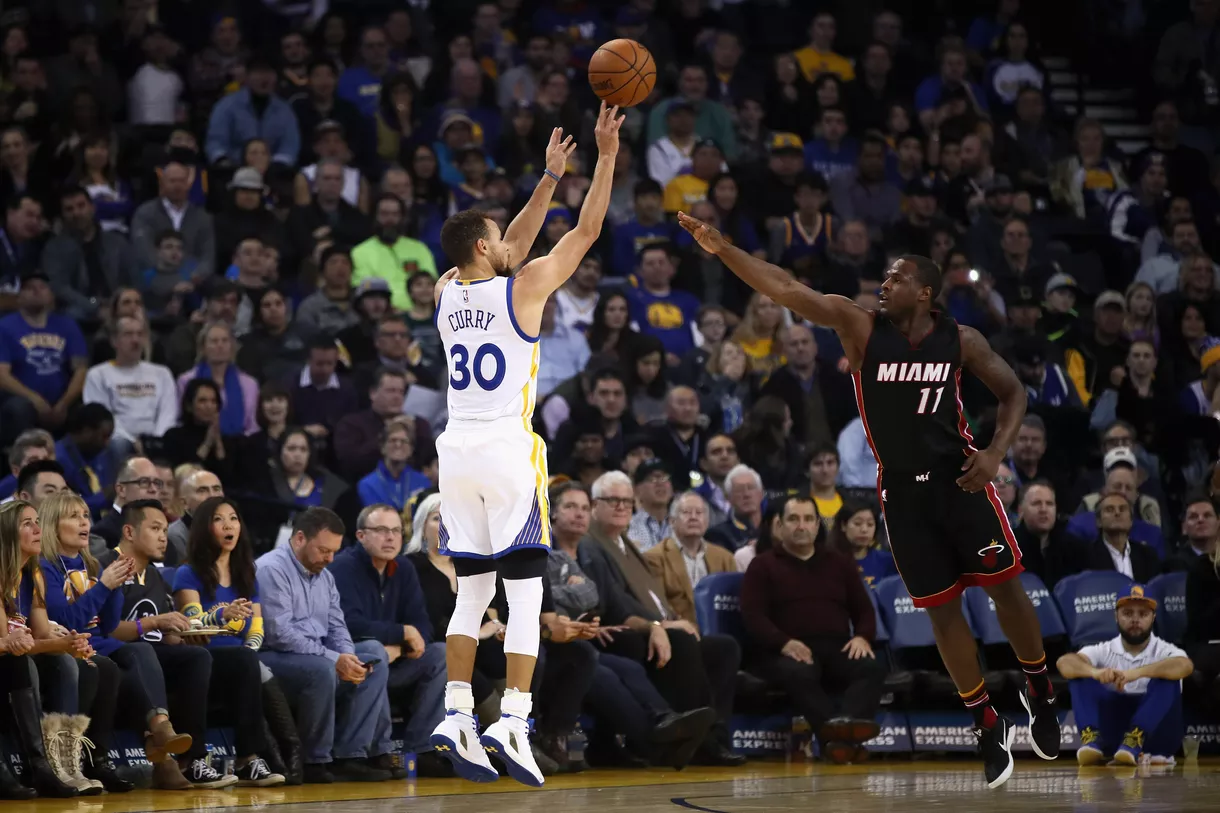

In [394]:
from IPython.core.display import Image
Image(filename='steph.jpg')

# <u>Respect The 3</u>

# An analysis of the 3-point shot's adoption, impact, and success within the National Basketball Association

## Authors: Hannah Rosen & Shad Khan

## Table of Contents
<ol>
  <li> Introduction</li>
  <li>Data Curation, Parsing, and Management
    <ol style="list-style-type: lower-alpha;">
      <li> Data Collection </li>
      <li> Data Processing </li>
    </ol>
   </li>
  <li>Exploratory Data Analysis & Data Visualization</li>
  <li>Hypothesis Testing & Machine Learning</li>
  <li>Insights & Policy Decisions</li>
  <li>Resources</li>
</ol>

## <u> 1. Introduction</u>

Let's time travel back to October 7, 1979. The 34th annual National Basketball Association is about to begin, and with that, comes the introduction of the 3-point line and field goal. Let's read what the <a href = "https://www.nytimes.com/1979/10/07/archives/nba-preview-new-faces-and-some-gimmicks.html">New York Times' NBA Preview </a> has to say about this new way to score : 

<blockquote>"But all the players in the National Basketball Association will have <b>one new gimmick</b> in common — the 3‐point field Goal."</blockquote>
<blockquote>"The N.B.A. is hoping the new players, <b>the new gimmick</b>, the return of pro basketball to Utah, a new alignment and a new schedule with more interconference play, <b> will help rebuild the sagging image the league suffered last season when attendance leveled off and television ratings dropped sharply. The declines were especially apparent in the major markets — New York, Los Angeles, Chicago, Boston and Philadelphia.</b>"</blockquote>

<p> As we can see, the 3 point shot was originally seen as a gimmick, a trick or quirk to try to woo fans that they desperately needed, both in the stands and in the media.</p>
<p> Here's a quick explanation of what a 3 pointer is: "Players can get 3 points by shooting from beyond 22 feet away from the basket at the sidelines and 23 feet and 9 inches away from the basket everywhere else."</p>
<p>Also, here's a picture of the NBA 3 point arc. Anything shot outside of the outer arc is a 3 pointer.</p>

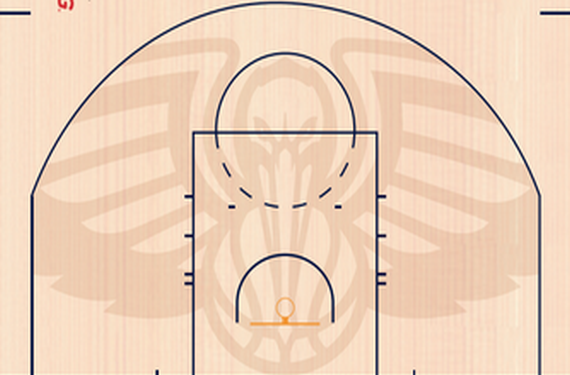

In [395]:
from IPython.core.display import Image
Image(filename='arc.png')

<p> Within the NBA community at the time, the viewpoint of the 3 pointer was just as cynical, as not all the coaches were thrilled with this new advent. </p>

<blockquote> “It may change our game at the end of the quarters,” said John MacLeod, coach of the Phoenix Suns, <b>“but I'm not going to set up plays for guys to bomb from 23 feet. I think that's very boring basketball.” </b></blockquote>

<p> So it looks like at the time, there was no hope and belief for NBA 3 Pointers. The media thought it was a gimmick, and the NBA coaches were adamant on not drawing plays (opportunities to score) for players to shoot from 23+ feet away.</p>

<p> Were they right? Would teams really choose to shoot 3 pointers further away from the basket than rather just stick with the method that worked for them for the last 33 years: shooting 2 pointers near the basket? At a time where media and attendace rates were dropping, would the 3 pointer help bring in popularity? </p>

<p> In this tutorial, our goal is to look at NBA team's data around the 3-pointer and see if we can find any insight regarding the adoption and use of 3-pointers from the moment it was introduced in 1979, as well as its ties to teams' success and scoring output. We'll see its impact in the league, and show that it's more than just "a gimmick."</p>

### REQUIRED TOOLS

<p> You will need the following libraries for this project: </p>

<ol>
    <li>Pandas - Python Library for Manipulating Tabular Data</li>
    <li>NumPy - Python Library for Manipulating nD Arrays</li>
    <li>scikit-learn - Popular Machine Learning library in Python
    <ul>
      <li>linear_model - used for fitting a linear model and applying linear regression on data</li>
        <li>model_selection - used to split up dataset into test and training data and evaluate predictions</li>
    </ul>
    </li>
    <li>Seaborn - Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.</li>
    <li>Matplotlib.pyplot - Python Library used to plot graphs and charts from Pandas dataframes.</li>
    
</ol>
    
<p>I've listed the more information about utilizing these relevant libaries at the bottom of this tutorial, under 'Resources"</p>

In [396]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import linear_model
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

## <u> 2. Data Curation, Parsing, and Management</u>
### <u> 2a. Data Collection</u>

<p> This is the the Data Collection stage of the data lifecycle. During this stage, we'll focus on getting our initial data from a specific source. </p>

<p> We'll get our data from two Kaggle CSV files. The data from the Season_Stats.csv file has individual NBA Players' data from 1950 to the present, while the team_records has data in regards to NBA teams' success on the court (win record, playoff information, ratings) </p>

<p> More information about the Kaggle datasets: </p> 
<ul>
    <li>Season Stats CSV File: <a href = "https://www.kaggle.com/drgilermo/nba-players-stats">NBA Players stats since 1950</a></li>
    <li>Team Records CSV File: <a href = "https://www.kaggle.com/boonpalipatana/nba-season-records-from-every-year">NBA Season Records from Every Year</a></li>
</ul>

In [397]:
# read csv files into pandas dataframes
players_stats = pd.read_csv("Seasons_Stats.csv")
team_records = pd.read_csv("Team_Records.csv")

In [398]:
players_stats.head()

Unnamed: 0    Year           Player  Pos   Age   Tm     G  GS  MP  PER  \
0           0  1950.0  Curly Armstrong  G-F  31.0  FTW  63.0 NaN NaN  NaN   
1           1  1950.0     Cliff Barker   SG  29.0  INO  49.0 NaN NaN  NaN   
2           2  1950.0    Leo Barnhorst   SF  25.0  CHS  67.0 NaN NaN  NaN   
3           3  1950.0       Ed Bartels    F  24.0  TOT  15.0 NaN NaN  NaN   
4           4  1950.0       Ed Bartels    F  24.0  DNN  13.0 NaN NaN  NaN   

   ...      FT%  ORB  DRB  TRB    AST  STL  BLK  TOV     PF    PTS  
0  ...    0.705  NaN  NaN  NaN  176.0  NaN  NaN  NaN  217.0  458.0  
1  ...    0.708  NaN  NaN  NaN  109.0  NaN  NaN  NaN   99.0  279.0  
2  ...    0.698  NaN  NaN  NaN  140.0  NaN  NaN  NaN  192.0  438.0  
3  ...    0.559  NaN  NaN  NaN   20.0  NaN  NaN  NaN   29.0   63.0  
4  ...    0.548  NaN  NaN  NaN   20.0  NaN  NaN  NaN   27.0   59.0  

[5 rows x 53 columns]

In [399]:
team_records.head()

Season   Lg             Team   W   L   W/L%  Finish   SRS  Pace  Rel_Pace  \
0  2017-18  NBA   Boston Celtics  29  10  0.744       1  4.38  95.4      -1.7   
1  2016-17  NBA  Boston Celtics*  53  29  0.646       1  2.25  96.8       0.4   
2  2015-16  NBA  Boston Celtics*  48  34  0.585       2  2.84  98.5       2.7   
3  2014-15  NBA  Boston Celtics*  40  42  0.488       2 -0.40  95.8       1.9   
4  2013-14  NBA   Boston Celtics  25  57  0.305       4 -4.97  93.3      -0.6   

    ORtg  Rel_ORtg   DRtg  Rel_DRtg                Playoffs  \
0  108.0       0.2  102.8      -5.0                     NaN   
1  111.2       2.4  108.4      -0.4    Lost E. Conf. Finals   
2  106.8       0.4  103.6      -2.8  Lost E. Conf. 1st Rnd.   
3  104.7      -0.9  104.5      -1.1  Lost E. Conf. 1st Rnd.   
4  102.9      -3.8  107.7       1.0                     NaN   

              Coaches            Top WS  
0  B. Stevens (29-10)   K. Irving (5.7)  
1  B. Stevens (53-29)  I. Thomas (12.5)  
2  B. Stevens (48-34)   I. Thomas (9.7)  
3  B. Stevens (40-42)   T. Zeller (6.5)  
4  B. Stevens (25-57)     B. Bass (5.1)

<p>As we see above, our two dataframes contain a lot of information regarding the data of individual NBA players as well as NBA teams. While this is a good start, we'll need to be manipulating and computing our data in order for it to provide us with the specific information that we want to extract from it as well as be able to do analysis upon.</p>
    
<p>From a high-level overview of these current two data frames, I already see some issues that we're going to have to deal with as we process our data. I see a lot of NaNs that need to be dealt with in the first DataFrame, as well as a lot of columns in both DataFrames that need to be deemed if necessary and worth keeping.</p>  

### <u> 2a. Data Processing</u>
This is the Data Processing state of the data lifecycle. During this stage, we will be re-structuring, re-organizing, and tidying our data (which is right now, our two dataframes) to prepare our data for readability and performing analysis on. 

We can name what we'll be doing in this section as Data Wrangling, which is the process of cleaning, structuring, and enriching our raw data in a desired format for us to effictively apply analysis and machine learning upon. For additonal resources explaining our data wranging, hit up link: https://www.trifacta.com/data-wrangling/

For example, some of the data wrangling we'll be doing is section involves the clarification of some of the columns in our DataFrames (structuring our data to only including necessary columns), dealing with NaN values (cleaning and tidying our data), and calculating additional three point metrics to our data for teams (enriching our raw data). Let's begin.

####  Filtering necessary columns in players_stats dataframe

Our players_stats DataFrame includes about 50 columns on NBA player data, which is a lot to be interpreting. Since we honestly are just looking at scoring, especially just 3 point scoring, we can filter our dataframe to only keep columns relevant to those metrics.

We'll keep the columns:
<ul>
    <li>Year</li>
    <li>Player</li>
    <li>Pos - Position</li>
    <li>Tm - Team</li>
    <li>3PAr - Their 3 point attempt rate, which is how many 3's they attempt over their total field goal attempts per game</li>
    <li>3P - Number of 3 point field goals they made</li>
    <li>3PA - Number of 3 point field goals they attempted</li>
    <li>3P% - Their 3 point percentage, which is 3P/3PA</li>
    <li>PTS - Total points they scored </li>
</ul>
    
And ditch the rest of the columns, as they don't relate to specific 3 point metrics (such as defensive stats (Rebounds, Steals, Blocks), assists, etc.). 

In [400]:
#create new data frame with only needed columns
players_stats = players_stats[['Year', 'Player', 'Pos', 'Tm', 
                             '3PAr', '3P', '3PA', '3P%', 'PTS']].copy()

players_stats.head()

Year           Player  Pos   Tm  3PAr  3P  3PA  3P%    PTS
0  1950.0  Curly Armstrong  G-F  FTW   NaN NaN  NaN  NaN  458.0
1  1950.0     Cliff Barker   SG  INO   NaN NaN  NaN  NaN  279.0
2  1950.0    Leo Barnhorst   SF  CHS   NaN NaN  NaN  NaN  438.0
3  1950.0       Ed Bartels    F  TOT   NaN NaN  NaN  NaN   63.0
4  1950.0       Ed Bartels    F  DNN   NaN NaN  NaN  NaN   59.0

####  Dealing with Missing Data
Wait a minute... why does the values for our players_stats dataframe contain NaN/null values, specifically for our desired 3 point statistics?

Well that's because, as mentioned before, the 3 point shot was introduced in the 1979-1980 season! So before that time, since the shot didn't even exist, there was no recorded data for this statistic for each player!

We can easily resolve this by just dropping all the rows in the 3P% column that have the value 'NaN', thus keeping our players_stats dataframe to only include players data from 1980 onwards, when our focused metric started to exist. 

In [401]:
#drop NaN 3P% rows -- will drop all before 1980 bc that's when 3 point line created
players_stats = players_stats[np.isfinite(players_stats['3P%'])]
players_stats.head()

Year                Player Pos   Tm   3PAr   3P   3PA    3P%     PTS
5727  1980.0  Kareem Abdul-Jabbar*   C  LAL  0.001  0.0   1.0  0.000  2034.0
5728  1980.0         Tom Abernethy  PF  GSW  0.003  0.0   1.0  0.000   362.0
5729  1980.0           Alvan Adams   C  PHO  0.002  0.0   2.0  0.000  1118.0
5730  1980.0       Tiny Archibald*  PG  BOS  0.023  4.0  18.0  0.222  1131.0
5732  1980.0            Gus Bailey  SG  WSB  0.029  1.0   1.0  1.000    38.0

####  Fixing TOT naming
Our players_stats dataset that we extracted the data from into our players_stats dataframe deals with players who played on 2+ different teams in a season (usually due to being traded) by creating an additional row for that player, with the Tm (team) labled 'TOT' (total), and included a sum of their statistics for each of the teams that the player played for, for that year. 

Since we will be doing an analysis with teams and 3 point statistics coming up later in the tutorial, we can get rid of any rows that have a team name of 'TOT', as that's actually not a team name at all. We'll still have the player's statistics for the different teams they played for that year (in different rows), just not a sum of their statistics for that year (in all one row).

In [402]:
#drop rows with team name as 'TOT' for clarity
players_stats = players_stats[players_stats.Tm != "TOT"]
players_stats.Tm.unique() # should not include 'TOT'

array(['LAL', 'GSW', 'PHO', 'BOS', 'WSB', 'IND', 'HOU', 'POR', 'MIL',
       'DET', 'CHI', 'PHI', 'KCK', 'UTA', 'DEN', 'NJN', 'SEA', 'SDC',
       'CLE', 'NYK', 'ATL', 'SAS', 'DAL', 'LAC', 'SAC', 'CHH', 'MIA',
       'ORL', 'MIN', 'VAN', 'TOR', 'WAS', 'MEM', 'NOH', 'CHA', 'NOK',
       'OKC', 'BRK', 'NOP', 'CHO'], dtype=object)

####  Aligning Team Names based on Team History
In the current NBA, there are 30 teams in the league. However, if you look at the number of unique team names in our dataframe above, you'll see that there are more than 30.

This is because the NBA, throughout its whole existence, has had a history of teams moving from cities to cities (for example, in 2012 the New Jersey Nets moved to Brooklyn and became the Brooklyn Nets), and teams just changing their names (the Charlotte Bobcats changing their name to the Charlotte Hornets). 

We decided to investigate this, and found an image that perfectly displays an NBA teams' name/location history throughout the years : 


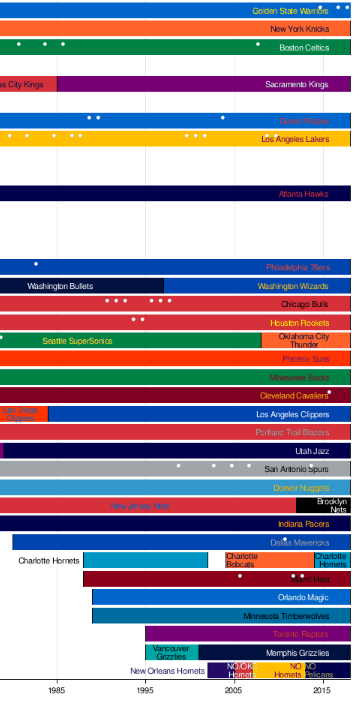

In [403]:
from IPython.core.display import Image
Image(filename='historyOfTeamNames.png')

As we can see from the image above, some teams (like the Houston Rockets), never changed names, while other teams (like the New Orlean Pelicans), have gone through at least one name change from the years 1980 - onwards. 

If you're interested in looking at the history of name changes throughout the entireity of the NBA's history, check out the full image here: https://en.wikipedia.org/wiki/Timeline_of_the_National_Basketball_Association

So to deal with the history of name or location changes of an NBA Team for our players_stats dataframe, we replaced each of the old Team Name acronyms with its respective current team name. So for example, the Vancouver Grizzlies (VAN) mentionings were replaced with Memphis Grizzlies (MEM) mentionings, as we can see that the Vancouver Grizzlies moved to Memphis around 2001-02, but they both share the same team history. 

In [404]:
# Replace old team names with current team names
players_stats = players_stats.replace('VAN', 'MEM')
players_stats = players_stats.replace('NJN', 'BRK')
players_stats = players_stats.replace('SDC', 'LAC')
players_stats = players_stats.replace('SEA', 'OKC')
players_stats = players_stats.replace('WSB', 'WAS')
players_stats = players_stats.replace('KCK', 'SAC')
players_stats = players_stats.replace('SEA', 'OKC')
players_stats = players_stats.replace('CHH', 'CHA')
players_stats = players_stats.replace('NOK', 'NOP')
players_stats = players_stats.replace('NOH', 'NOP')
players_stats = players_stats.replace('CHH', 'CHA')
players_stats = players_stats.replace('CHO', 'CHA')

len (players_stats.Tm.unique()) #Should be 30, as there are currently 30 NBA Tms

30

Great! We have successfully replaced all the old team name acronyms with their
current modern day ones, as we can see that our player_stats dataframe has 30 unique NBA teams.

####  Filtering necessary columns in team_records dataframe

In our team_records dataframe, we'll keep the columns:

<ul>
    <li>Season</li>
    <li>Team</li>
    <li>W - wins</li>
    <li>L - losses</li>
    <li>W/L% - Win Percentage, which is # wins / # total games played</li>
    <li>ORtg - Offensive rating, which is a metric that measures a team's offensive performance.</li>
</ul>
    
These are the columns that will be relevant to our analysis, as the columns represent a team's success (wins) as well as a metric that reflects how well they play (offensive rating). 

In [405]:
team_records = team_records[['Season', 'Team', 'W', 'L', 'W/L%', 'ORtg']].copy()
team_records.head()

Season             Team   W   L   W/L%   ORtg
0  2017-18   Boston Celtics  29  10  0.744  108.0
1  2016-17  Boston Celtics*  53  29  0.646  111.2
2  2015-16  Boston Celtics*  48  34  0.585  106.8
3  2014-15  Boston Celtics*  40  42  0.488  104.7
4  2013-14   Boston Celtics  25  57  0.305  102.9

####  Making sure the timeframe is correct for team_records
As mentioned before, three pointers were newly introduced in 1979, so like how we did with the players_stats dataframe, we will filter our team_records dataframe to only include data from 1980 onwards, when our focused 3 point metrics started to exist.

In [406]:
team_records = team_records.sort_values(by=['Season'],ascending=True)
# Filtering data to only include data from 1980 onwards
team_records = team_records[team_records.Season >= "1980-81"]
team_records.head()

Season                     Team   W   L   W/L%   ORtg
595   1980-81          Detroit Pistons  21  61  0.256   98.1
353   1980-81      Seattle SuperSonics  34  48  0.415  103.2
1459  1980-81         Dallas Mavericks  15  67  0.183  102.4
988   1980-81       Kansas City Kings*  40  42  0.488  104.7
455   1980-81  Portland Trail Blazers*  45  37  0.549  106.5

####  Cleaning untidy data

We define 'tidy' data as:
<ol>
    <li>Each variable forms a column</li>
    <li>Each observation forms a row</li>
    <li>Each type of observational unit forms a table</li>
</ol>

When we look at our team_records dataframe above, it's tidy in terms of #2 & #3, but however, we have an issue that comes up with #1. For some awkward reason, we discovered that in the Team column, the orignal creator of the dataset put an asterisk (\*) next to the team name if they made the playoffs that year. So for example, in the dataframe up above, the Lakers have a (\*) next to their name as they made the playoffs in '80-'81. 

This is an awful way to store information on whether a team made the playoffs or not, and it makes our data untidy as now two variables (team name and ifMadePlayoffs) occupy one column, when it should occupy two columns for two seperate variables. 

We'll clean the untidyness of the team_records by replacing all the teams with a (\*) next to their name with just the same string without the (\*). 

In our analysis we do not deal with if the teams made the playoffs or not, but if we truly wanted to complete the tidyness process of our data, we'll then add another column which says true or false on if they made the playoffs. This will make it then that both the variables have their own columns. 

In order to learn more about untidy data and how to resolve and clean the data, check out this link: https://www.measureevaluation.org/resources/newsroom/blogs/tidy-data-and-how-to-get-it

In [407]:
#Replace starred names -- noticed the stars UNTIDY DATAAA
team_records = team_records.replace('Detroit Pistons*', 'Detroit Pistons')
team_records = team_records.replace('Seattle SuperSonics*', 'Seattle SuperSonics')
team_records = team_records.replace('Dallas Mavericks*', 'Dallas Mavericks')
team_records = team_records.replace('Kansas City Kings*', 'Kansas City Kings')
team_records = team_records.replace('Portland Trail Blazers*', 'Portland Trail Blazers')
team_records = team_records.replace('San Diego Clippers*', 'San Diego Clippers')
team_records = team_records.replace('Philadelphia 76ers*', 'Philadelphia 76ers')
team_records = team_records.replace('New Jersey Nets*', 'New Jersey Nets')
team_records = team_records.replace('Milwaukee Bucks*', 'Milwaukee Bucks')
team_records = team_records.replace('Golden State Warriors*', 'Golden State Warriors')
team_records = team_records.replace('Indiana Pacers*', 'Indiana Pacers')
team_records = team_records.replace('Chicago Bulls*', 'Chicago Bulls')
team_records = team_records.replace('New York Knicks*', 'New York Knicks')
team_records = team_records.replace('Denver Nuggets*', 'Denver Nuggets')
team_records = team_records.replace('Boston Celtics*', 'Boston Celtics')
team_records = team_records.replace('San Antonio Spurs*', 'San Antonio Spurs')
team_records = team_records.replace('Houston Rockets*', 'Houston Rockets')
team_records = team_records.replace('Phoenix Suns*', 'Phoenix Suns')
team_records = team_records.replace('Utah Jazz*', 'Utah Jazz')
team_records = team_records.replace('Los Angeles Lakers*', 'Los Angeles Lakers')
team_records = team_records.replace('Washington Bullets*', 'Washington Bullets')
team_records = team_records.replace('Atlanta Hawks*', 'Atlanta Hawks')
team_records = team_records.replace('Sacramento Kings*', 'Sacramento Kings')
team_records = team_records.replace('Los Angeles Clippers*', 'Los Angeles Clippers')
team_records = team_records.replace('Sacramento Kings*', 'Sacramento Kings')
team_records = team_records.replace('Cleveland Cavaliers*', 'Cleveland Cavaliers')
team_records = team_records.replace('Miami Heat*', 'Miami Heat')
team_records = team_records.replace('Charlotte Hornets*', 'Charlotte Hornets')
team_records = team_records.replace('Orlando Magic*', 'Orlando Magic')
team_records = team_records.replace('Minnesota Timberwolves*', 'Minnesota Timberwolves')
team_records = team_records.replace('Vancouver Grizzlies*', 'Vancouver Grizzlies')
team_records = team_records.replace('Toronto Raptors*', 'Toronto Raptors')
team_records = team_records.replace('Washington Wizards*', 'Washington Wizards')
team_records = team_records.replace('Memphis Grizzlies*', 'Memphis Grizzlies')
team_records = team_records.replace('New Orleans Hornets*', 'New Orleans Hornets')
team_records = team_records.replace('Charlotte Bobcats*', 'Charlotte Bobcats')
team_records = team_records.replace('New Orleans/Oklahoma City Hornets*', 'New Orleans/Oklahoma City Hornets')
team_records = team_records.replace('Oklahoma City Thunder*', 'Oklahoma City Thunder')
team_records = team_records.replace('Brooklyn Nets*', 'Brooklyn Nets')
team_records = team_records.replace('New Orleans Pelicans*', 'New Orleans Pelicans')

team_records.head()


Season                    Team   W   L   W/L%   ORtg
595   1980-81         Detroit Pistons  21  61  0.256   98.1
353   1980-81     Seattle SuperSonics  34  48  0.415  103.2
1459  1980-81        Dallas Mavericks  15  67  0.183  102.4
988   1980-81       Kansas City Kings  40  42  0.488  104.7
455   1980-81  Portland Trail Blazers  45  37  0.549  106.5

####  Aligning Team Names and Adding Acronyms to our team_records dataframe

We'll replace all the old team names with the current team names in our team_records dataframe. Then we create an acronym column, and fill it in with the row's respective team name's acronym. 

In [408]:
#Replace old team names
team_records = team_records.replace('Vancouver Grizzlies', 'Memphis Grizzlies')
team_records = team_records.replace('New Jersey Nets', 'Brooklyn Nets')
team_records = team_records.replace('San Diego Clippers', 'Los Angeles Clippers')
team_records = team_records.replace('Seattle SuperSonics', 'Oklahoma City Thunder')
team_records = team_records.replace('Washington Bullets', 'Washington Wizards')
team_records = team_records.replace('Kansas City Kings', 'Sacramento Kings')
team_records = team_records.replace('Charlotte Bobcats', 'Charlotte Hornets')
team_records = team_records.replace('New Orleans/Oklahoma City Hornets', 'New Orleans Pelicans')
team_records = team_records.replace('New Orleans Hornets', 'New Orleans Pelicans')

#Add team acronym column
team_records['Acronym'] = team_records['Team']

team_records['Acronym'] = team_records['Acronym'].replace("Atlanta Hawks", "ATL")
team_records['Acronym'] = team_records['Acronym'].replace("Brooklyn Nets", "BKN")
team_records['Acronym'] = team_records['Acronym'].replace("Boston Celtics", "BOS")
team_records['Acronym'] = team_records['Acronym'].replace("Detroit Pistons", "DET")
team_records['Acronym'] = team_records['Acronym'].replace("Charlotte Hornets", "CHA")
team_records['Acronym'] = team_records['Acronym'].replace("Chicago Bulls", "CHI")
team_records['Acronym'] = team_records['Acronym'].replace("Cleveland Cavaliers", "CLE")
team_records['Acronym'] = team_records['Acronym'].replace("Dallas Mavericks", "DAL")
team_records['Acronym'] = team_records['Acronym'].replace("Denver Nuggets", "DEN")
team_records['Acronym'] = team_records['Acronym'].replace("Detroit Pistons", "DET")
team_records['Acronym'] = team_records['Acronym'].replace("Golden State Warriors", "GSW")
team_records['Acronym'] = team_records['Acronym'].replace("Houston Rockets", "HOU")
team_records['Acronym'] = team_records['Acronym'].replace("Los Angeles Clippers", "LAC")
team_records['Acronym'] = team_records['Acronym'].replace("Los Angeles Lakers", "LAL")
team_records['Acronym'] = team_records['Acronym'].replace("Memphis Grizzlies", "MEM")
team_records['Acronym'] = team_records['Acronym'].replace("Miami Heat", "MIA")
team_records['Acronym'] = team_records['Acronym'].replace("Milwaukee Bucks", "MIL")
team_records['Acronym'] = team_records['Acronym'].replace("Minnesota Timberwolves", "MIN")
team_records['Acronym'] = team_records['Acronym'].replace("New Orleans Pelicans", "NOP")
team_records['Acronym'] = team_records['Acronym'].replace("New York Knicks", "NYK")
team_records['Acronym'] = team_records['Acronym'].replace("Oklahoma City Thunder", "OKC")
team_records['Acronym'] = team_records['Acronym'].replace("Orlando Magic", "ORL")
team_records['Acronym'] = team_records['Acronym'].replace("Philadelphia 76ers", "PHI")
team_records['Acronym'] = team_records['Acronym'].replace("Phoenix Suns", "PHX")
team_records['Acronym'] = team_records['Acronym'].replace("Portland Trail Blazers", "POR")
team_records['Acronym'] = team_records['Acronym'].replace("Sacramento Kings", "SAC")
team_records['Acronym'] = team_records['Acronym'].replace("San Antonio Spurs", "SAS")
team_records['Acronym'] = team_records['Acronym'].replace("Toronto Raptors", "TOR")
team_records['Acronym'] = team_records['Acronym'].replace("Utah Jazz", "UTA")
team_records['Acronym'] = team_records['Acronym'].replace("Washington Wizards", "WAS")
team_records.head()

Season                    Team   W   L   W/L%   ORtg Acronym
595   1980-81         Detroit Pistons  21  61  0.256   98.1     DET
353   1980-81   Oklahoma City Thunder  34  48  0.415  103.2     OKC
1459  1980-81        Dallas Mavericks  15  67  0.183  102.4     DAL
988   1980-81        Sacramento Kings  40  42  0.488  104.7     SAC
455   1980-81  Portland Trail Blazers  45  37  0.549  106.5     POR

#### Change season to just include the starting year in team_record data frame

We'll have the 'Season' column of the dataframe just include the starting year of the season (so instead of 1980-81 just have 1980). We then encode both 'season' in our team_record dataframe and 'year' in our players_stats dataframe as integers, instead of strings. 

In [409]:
team_records.Season = team_records.Season.str.slice(0, 4)

#convert season datatype to int
team_records = team_records.astype({"Season": int})
team_records.head()

Season                    Team   W   L   W/L%   ORtg Acronym
595     1980         Detroit Pistons  21  61  0.256   98.1     DET
353     1980   Oklahoma City Thunder  34  48  0.415  103.2     OKC
1459    1980        Dallas Mavericks  15  67  0.183  102.4     DAL
988     1980        Sacramento Kings  40  42  0.488  104.7     SAC
455     1980  Portland Trail Blazers  45  37  0.549  106.5     POR

In [410]:
#convert year datatype to int
players_stats = players_stats.astype({"Year": int})
players_stats.head()

Year                Player Pos   Tm   3PAr   3P   3PA    3P%     PTS
5727  1980  Kareem Abdul-Jabbar*   C  LAL  0.001  0.0   1.0  0.000  2034.0
5728  1980         Tom Abernethy  PF  GSW  0.003  0.0   1.0  0.000   362.0
5729  1980           Alvan Adams   C  PHO  0.002  0.0   2.0  0.000  1118.0
5730  1980       Tiny Archibald*  PG  BOS  0.023  4.0  18.0  0.222  1131.0
5732  1980            Gus Bailey  SG  WAS  0.029  1.0   1.0  1.000    38.0

#### Creating a new dataframe with 3-point summary stats for each (team, year)

Utilizing our players_stats dataframe, we'll group the data by Year and Team, which will give us groups of dataframes for each (team, year) pairings in our players_stats dataframe. 

As we iterate through each groups, we'll calculate each team's:
<ul>
    <li>three_percentage_mean - average three point percentage for the team</li>
    <li>three_attempt_ratio_mean - average three point attempt ratio for the team</li>
    <li>three_made_sum - total 3's made for that team for that year</li>
    <li>three_attempt_sum - total 3's attempted for that team for that year</li>
    <li>points_sum - total points scored for that team for that year</li>
</ul>

and store those values in a new dataframe.

In [411]:
#add 3pt stats to team dataframe
arr = []
x =  players_stats.groupby(["Year", "Tm"])

for (year, team) , g in players_stats.groupby(["Year", "Tm"]):
    three_percentage_mean = g["3P%"].mean()
    three_attempt_ratio_mean = g["3PAr"].mean()
    three_made_sum = g["3P"].sum()
    three_attempt_sum = g["3PA"].sum()
    points_sum = g["PTS"].sum()
    arr.append([year, team,three_percentage_mean,three_attempt_ratio_mean, three_made_sum,three_attempt_sum, points_sum])
    
result = pd.DataFrame(arr)
result = result.rename(index=str, columns = {0: "Season", 1: "Acronym", 2: "3P%_mean", 3: "3PAr_mean", 4: "3P_sum", 5: "3PA_sum", 6: "PTS_sum"})
result.head()

Season Acronym  3P%_mean  3PAr_mean  3P_sum  3PA_sum  PTS_sum
0    1980     ATL  0.133273   0.019000    13.0     75.0   7617.0
1    1980     BOS  0.308800   0.058200   162.0    422.0   7778.0
2    1980     BRK  0.188333   0.034133    85.0    298.0   8855.0
3    1980     CHI  0.153500   0.053000    70.0    275.0   6884.0
4    1980     CLE  0.151929   0.041429    36.0    187.0   9356.0

#### The Magic: Inner Join

We have two dataframes: result and team_records. One, for each Season and Team observation, includes metrics on team success (records, ratings). Another, for each Season and Team observation, includes metrics on 3 pointers. Let's merge the two dataframes to get a structured, unified view of our data, and to make our interpretation and analysis focused on one dataframe (thus restructuring our data for analysis).

To combine our data for both dataframes, we use an <b>inner join</b> on "Season" and "Acronym" to merge our two dataframes. We use an inner join because we want observations that have that specific "Season","Acronym" combination common to both of our dataframes.

To learn more about the different types of joins on two tables possible, in order to merge data and tables, you can read more here: https://www.diffen.com/difference/Inner_Join_vs_Outer_Join

In [412]:
merged_df = team_records.merge(result, how = "inner", left_on = ["Season", "Acronym"], right_on = ["Season", "Acronym"])
merged_df.tail()

Season                  Team   W   L   W/L%   ORtg Acronym  3P%_mean  \
924    2017  New Orleans Pelicans  18  17  0.514  110.6     NOP  0.326417   
925    2017    Philadelphia 76ers  15  19  0.441  105.8     PHI  0.303950   
926    2017      Dallas Mavericks  12  25  0.324  105.6     DAL  0.278739   
927    2017       New York Knicks  17  18  0.486  107.6     NYK  0.281067   
928    2017        Boston Celtics  29  10  0.744  108.0     BOS  0.351133   

     3PAr_mean  3P_sum  3PA_sum  PTS_sum  
924   0.390042   768.0   2196.0   8384.0  
925   0.337950   831.0   2443.0   7810.0  
926   0.349609   878.0   2473.0   7841.0  
927   0.292267   704.0   2022.0   8516.0  
928   0.350733   985.0   2742.0   8857.0

#### Removing the year '2017' from our merged_df because dataset was produced halfway through the 2017 season. 

In [413]:
##Some of the teams do not have data for all 82 games for the 2017 season 
# so we will not use that data.
merged_df = merged_df[merged_df.Season <=2016]
merged_df.tail()

Season                    Team   W   L   W/L%   ORtg Acronym  3P%_mean  \
897    2016  Minnesota Timberwolves  31  51  0.378  110.8     MIN  0.288929   
898    2016      Los Angeles Lakers  26  56  0.317  106.0     LAL  0.232538   
899    2016       Memphis Grizzlies  43  39  0.524  107.7     MEM  0.288348   
900    2016      Philadelphia 76ers  28  54  0.341  103.2     PHI  0.290556   
901    2016         Houston Rockets  55  27  0.671  114.7     HOU  0.251125   

     3PAr_mean  3P_sum  3PA_sum  PTS_sum  
897   0.251429   455.0   1347.0   8301.0  
898   0.294462   639.0   2016.0   7762.0  
899   0.265304   504.0   1521.0   7903.0  
900   0.285278   764.0   2255.0   7988.0  
901   0.330937   878.0   2533.0   8733.0

#### Enriching our data for analysis

Just to have more data available for analyzing the 3 point shot's adoption, impact, and success in the NBA, we compute the points scored off 3's for each (team,year) as well as the other points scored not off 3's. 

In [414]:
merged_df['3PScored'] = 0
merged_df['OtherScored'] = 0

for index,row in merged_df.iterrows():
    threePoints = row["3P_sum"] * 3 #Number of threes * 3 = 3PScored
    other = row["PTS_sum"] - threePoints #TotalPoints - 3PScored = other
    
    merged_df.at[index, "3PScored"] = threePoints
    merged_df.at[index, "OtherScored"] = other
    
merged_df.tail()

Season                    Team   W   L   W/L%   ORtg Acronym  3P%_mean  \
897    2016  Minnesota Timberwolves  31  51  0.378  110.8     MIN  0.288929   
898    2016      Los Angeles Lakers  26  56  0.317  106.0     LAL  0.232538   
899    2016       Memphis Grizzlies  43  39  0.524  107.7     MEM  0.288348   
900    2016      Philadelphia 76ers  28  54  0.341  103.2     PHI  0.290556   
901    2016         Houston Rockets  55  27  0.671  114.7     HOU  0.251125   

     3PAr_mean  3P_sum  3PA_sum  PTS_sum  3PScored  OtherScored  
897   0.251429   455.0   1347.0   8301.0      1365         6936  
898   0.294462   639.0   2016.0   7762.0      1917         5845  
899   0.265304   504.0   1521.0   7903.0      1512         6391  
900   0.285278   764.0   2255.0   7988.0      2292         5696  
901   0.330937   878.0   2533.0   8733.0      2634         6099

## <u> 3. Exploratory Data Analysis & Visualization</u>

This is the Exploratory Data Analysis & Visualization stage of the data lifecycle. During this stage, we will utilze the summary statistics that we computed as well as graphical representations to discover trends and assumptions of our data. 

A formal definition and explanation of Exploratory Data Analysis can be found here as a resource: https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15

### Three point attempts per Team over Time

In our introduction, we saw how when the 3 point line and field goal was originally introduced to the NBA, coaches remarked on how they "wouldn't want to draw plays for their players to shoot from over 23ft" and because of that were not too passionate about adopting this 3 point shot (gimmick).

So, with this, let's see if there's a general increase in 3 Point Attempts per team over time, despite the remark said above. 

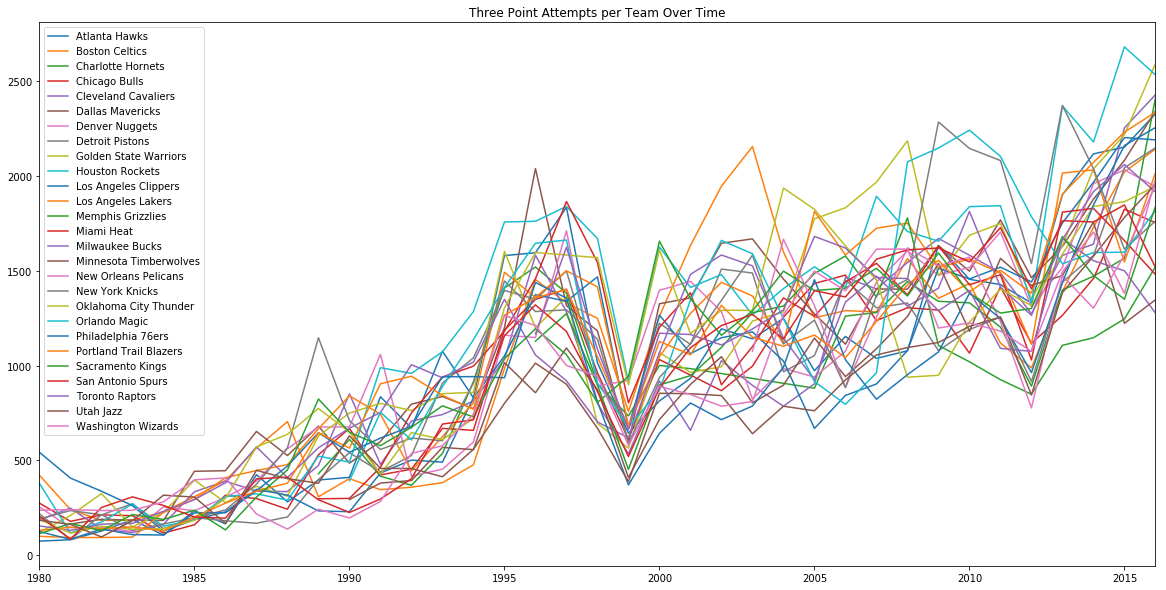

In [415]:
fig, ax = plt.subplots(figsize=(20,10))

for key , g in merged_df.groupby(["Team"]):
    ax.plot(g["Season"], g["3PA_sum"], label = key)
    
ax.set_xlim(1980,2016)
ax.legend()
plt.title('Three Point Attempts per Team Over Time');


#Low spikes due to NBA lockout -- did not play games


*During the years 1995-99 and 2011-2012, when the two dips in the graph above occurred, the NBA had several lockouts, where the players stopped working (playing) due to settling their collective bargaining agreement. Because they were essentially on strike, teams played on average of 50 games rather than the full 82 games per season. So evidently, less games = less 3 point attempts occuring*

As we can see from the graph above, other than the years of the dips (explained above), we can see that teams have been adopting the 3 point shot as the years have gone on. 

Even though the NBA community was hesistant originally about the introduction of the shot and how often it'd be occuring (since it's MUCH further away from the basket), we can see that it's been prevalent and impactful to the league as the years have gone on. It's definetly been respected and adopted by the league, as we can see on the left the number of attempts has actually <b>quintupled</b> through the years!

### Exploring a correlation between three point percentage and W's

Let's explore a correlation between 3 point percentage and wins for teams. To explore different time periods, we split our data into 5 distinct time periods, and also calculate summary statistics for each of the teams during those 5 time periods. 

In [416]:
#split data into time periods of 1980-1989, 1990-2002, 2003-2010, 2011-present)

df1 = merged_df.loc[merged_df['Season'] < 1990]
df2 = merged_df.loc[merged_df['Season'] < 2003]
df2 = df2.loc[merged_df['Season'] >= 1990]
df3 = merged_df.loc[merged_df['Season'] < 2011]
df3 = df3.loc[merged_df['Season'] >= 2003]
df4 = merged_df.loc[merged_df['Season'] >= 2011]


df4.head() # Should be seasons from 2011 onwards

Season                    Team   W   L   W/L%   ORtg Acronym  3P%_mean  \
740    2011     Cleveland Cavaliers  21  45  0.318  101.1     CLE  0.257625   
741    2011         Houston Rockets  34  32  0.515  105.5     HOU  0.262625   
742    2011  Portland Trail Blazers  28  38  0.424  105.7     POR  0.306462   
743    2011   Golden State Warriors  23  43  0.348  105.4     GSW  0.290417   
744    2011    New Orleans Pelicans  21  45  0.318  100.9     NOP  0.237187   

     3PAr_mean  3P_sum  3PA_sum  PTS_sum  3PScored  OtherScored  
740   0.265625   509.0   1489.0   7371.0      1527         5844  
741   0.247750   677.0   1843.0   8626.0      2031         6595  
742   0.222308   518.0   1503.0   7798.0      1554         6244  
743   0.256833   685.0   1749.0   7607.0      2055         5552  
744   0.255875   444.0   1232.0   7594.0      1332         6262

#### Calculating Summary Statistics for each of the 5 years 

Within each of the 5 year dataframes, we'll calculate summary statistics revolving around the 3 point metrics. 

As we loop through each dataframe's teams, for:
<ul>
    <li> ratios or ratings such as 3 Point attempt ratio, 3 Point Percentage, Win loss Percentage, and Offensive ratings, we'll just calculate the <b>average</b> of each respective statistic throughout those 5 years for a specific team, and input those respective values in our new dataframe. </li>
    <li> totals such as 3's attempted, 3's made, number of wins, 3 points scored, and other points scored (2 or 1 pt FG), we'll just calculate the <b>sum</b> of each respective statistic throughout those 5 years for a specific team, and input those respective values in our new dataframe </li>
</ul>



In [417]:
#1980-1989
arr = []

for (team, grp) in df1.groupby(['Team']):
    threeAttempts = grp["3PA_sum"].sum()
    threeRatio = grp["3PAr_mean"].mean()
    threeMakes = grp["3P_sum"].sum()
    threePercentage = grp["3P%_mean"].mean()
    wins = grp["W"].sum()
    winPercentage = grp["W/L%"].mean()
    ORtg = grp["ORtg"].mean()
    threePointSum = grp["3PScored"].sum()
    otherPointSum = grp["OtherScored"].sum()
    arr.append([team, threeAttempts, threeRatio, threeMakes, threePercentage, wins, winPercentage, ORtg, threePointSum, otherPointSum])

df1_averages = pd.DataFrame(arr)
df1_averages.columns = ["Team", "3PA_sum", "3PAr_mean", "3P_sum", "3P%_mean", "W", "W/L%", "ORtg", "3PScored", "OtherScored"]
df1_averages.head()

Team  3PA_sum  3PAr_mean  3P_sum  3P%_mean    W    W/L%  \
0        Atlanta Hawks   2084.0   0.048794   555.0  0.175636  440  0.5366   
1       Boston Celtics   3543.0   0.059616  1174.0  0.184398  583  0.7109   
2    Charlotte Hornets    430.0   0.044867   134.0  0.244467   19  0.2320   
3        Chicago Bulls   2543.0   0.048680   652.0  0.152710  394  0.4805   
4  Cleveland Cavaliers   2731.0   0.044894   812.0  0.152716  331  0.4035   

     ORtg  3PScored  OtherScored  
0  108.00      1665        79353  
1  111.23      3522        73307  
2  102.00       402         8126  
3  107.65      1956        76945  
4  104.93      2436        77904

In [418]:
#1990-2002
arr = []

for (team, grp) in df2.groupby(['Team']):
    threeAttempts = grp["3PA_sum"].sum()
    threeRatio = grp["3PAr_mean"].mean()
    threeMakes = grp["3P_sum"].sum()
    threePercentage = grp["3P%_mean"].mean()
    wins = grp["W"].sum()
    winPercentage = grp["W/L%"].mean()
    ORtg = grp["ORtg"].mean()
    threePointSum = grp["3PScored"].sum()
    otherPointSum = grp["OtherScored"].sum()
    arr.append([team, threeAttempts, threeRatio, threeMakes, threePercentage, wins, winPercentage, ORtg, threePointSum, otherPointSum])

df2_averages = pd.DataFrame(arr)
df2_averages.columns = ["Team", "3PA_sum", "3PAr_mean", "3P_sum", "3P%_mean", "W", "W/L%", "ORtg", "3PScored", "OtherScored"]
df2_averages.head()

Team  3PA_sum  3PAr_mean  3P_sum  3P%_mean    W      W/L%  \
0        Atlanta Hawks  13434.0   0.175806  4567.0  0.243674  527  0.512846   
1       Boston Celtics  12583.0   0.165937  4337.0  0.227504  489  0.470154   
2    Charlotte Hornets  10785.0   0.162983  3992.0  0.260806  503  0.528250   
3        Chicago Bulls  11238.0   0.155069  3987.0  0.265307  586  0.557462   
4  Cleveland Cavaliers  11431.0   0.163748  4243.0  0.251371  500  0.482154   

         ORtg  3PScored  OtherScored  
0  105.592308     13701        83532  
1  105.307692     13011        81679  
2  106.825000     11976        80690  
3  106.007692     11961        82474  
4  105.038462     12729        78315

In [419]:
#2003-2010
arr = []

for (team, grp) in df3.groupby(['Team']):
    threeAttempts = grp["3PA_sum"].sum()
    threeRatio = grp["3PAr_mean"].mean()
    threeMakes = grp["3P_sum"].sum()
    threePercentage = grp["3P%_mean"].mean()
    wins = grp["W"].sum()
    winPercentage = grp["W/L%"].mean()
    ORtg = grp["ORtg"].mean()
    threePointSum = grp["3PScored"].sum()
    otherPointSum = grp["OtherScored"].sum()
    arr.append([team, threeAttempts, threeRatio, threeMakes, threePercentage, wins, winPercentage, ORtg, threePointSum, otherPointSum])

df3_averages = pd.DataFrame(arr)
df3_averages.columns = ["Team", "3PA_sum", "3PAr_mean", "3P_sum", "3P%_mean", "W", "W/L%", "ORtg", "3PScored", "OtherScored"]
df3_averages.head()

Team  3PA_sum  3PAr_mean  3P_sum  3P%_mean    W      W/L%  \
0        Atlanta Hawks   9721.0   0.191087  3395.0  0.274895  278  0.423750   
1       Boston Celtics  11931.0   0.246228  4280.0  0.270238  372  0.567125   
2    Charlotte Hornets   7535.0   0.232462  2684.0  0.301436  204  0.414667   
3        Chicago Bulls  10064.0   0.218749  3648.0  0.265059  337  0.513625   
4  Cleveland Cavaliers  10251.0   0.228236  3641.0  0.246368  368  0.561125   

         ORtg  3PScored  OtherScored  
0  105.650000     10185        50345  
1  106.575000     12840        48197  
2  103.866667      8052        30820  
3  103.875000     10944        45377  
4  106.637500     10923        51084

In [420]:
#2011-2016
arr = []

for (team, grp) in df4.groupby(['Team']):
    threeAttempts = grp["3PA_sum"].sum()
    threeRatio = grp["3PAr_mean"].mean()
    threeMakes = grp["3P_sum"].sum()
    threePercentage = grp["3P%_mean"].mean()
    wins = grp["W"].sum()
    winPercentage = grp["W/L%"].mean()
    ORtg = grp["ORtg"].mean()
    threePointSum = grp["3PScored"].sum()
    otherPointSum = grp["OtherScored"].sum()
    arr.append([team, threeAttempts, threeRatio, threeMakes, threePercentage, wins, winPercentage, ORtg, threePointSum, otherPointSum])

df4_averages = pd.DataFrame(arr)
df4_averages.columns = ["Team", "3PA_sum", "3PAr_mean", "3P_sum", "3P%_mean", "W", "W/L%", "ORtg", "3PScored", "OtherScored"]
df4_averages.head()

Team  3PA_sum  3PAr_mean  3P_sum  3P%_mean    W      W/L%  \
0        Atlanta Hawks  11253.0   0.315612  4101.0  0.313043  273  0.574500   
1       Boston Celtics   9389.0   0.287276  3221.0  0.296398  246  0.520167   
2    Charlotte Hornets   8941.0   0.267102  3012.0  0.293924  188  0.385333   
3        Chicago Bulls   8834.0   0.272388  3180.0  0.279807  276  0.585667   
4  Cleveland Cavaliers  10664.0   0.324365  3786.0  0.283418  239  0.496000   

         ORtg  3PScored  OtherScored  
0  105.750000     12303        34004  
1  104.950000      9663        33437  
2  102.716667      9036        32913  
3  105.550000      9540        34059  
4  107.533333     11358        32366

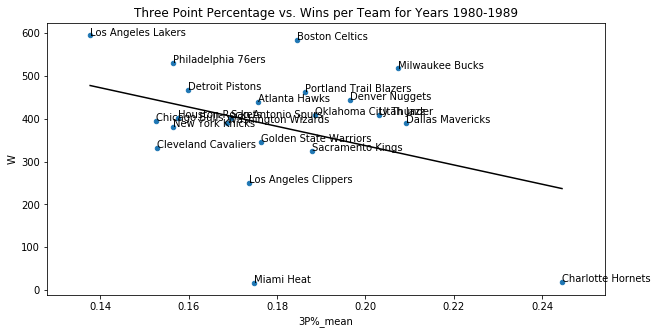

In [421]:
#1980-1989 graph
fig, ax = plt.subplots();
df1_averages.plot(ax = ax, kind = 'scatter', x = '3P%_mean', y = 'W', title= 'Three Point Percentage vs. Wins per Team for Years 1980-1989', figsize = (10, 5))

for (name, grp) in df1_averages.groupby(['Team']):
    plt.text(grp['3P%_mean'], grp['W'], str(name))

#plotting the linear regression line
plt.plot(np.unique(df1_averages['3P%_mean']), np.poly1d(np.polyfit(x = df1_averages['3P%_mean'], y = df1_averages['W'], deg = 1))(np.unique(df1_averages['3P%_mean'])), color = 'black')

plt.show()

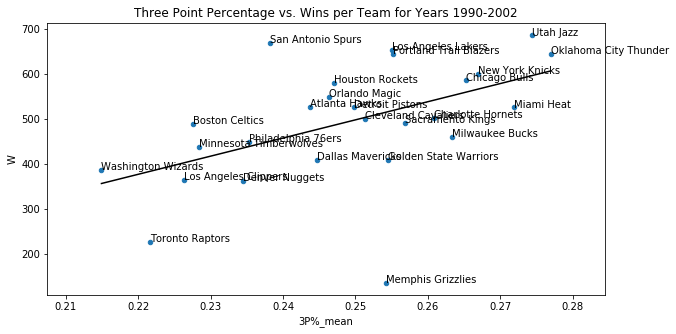

In [422]:
#1990-2002 graph
fig, ax = plt.subplots();
df2_averages.plot(ax = ax, kind = 'scatter', x = '3P%_mean', y = 'W', title= 'Three Point Percentage vs. Wins per Team for Years 1990-2002', figsize = (10, 5))

for (name, grp) in df2_averages.groupby(['Team']):
    plt.text(grp['3P%_mean'], grp['W'], str(name))

plt.plot(np.unique(df2_averages['3P%_mean']), np.poly1d(np.polyfit(x = df2_averages['3P%_mean'], y = df2_averages['W'], deg = 1))(np.unique(df2_averages['3P%_mean'])), color = 'black')

plt.show()



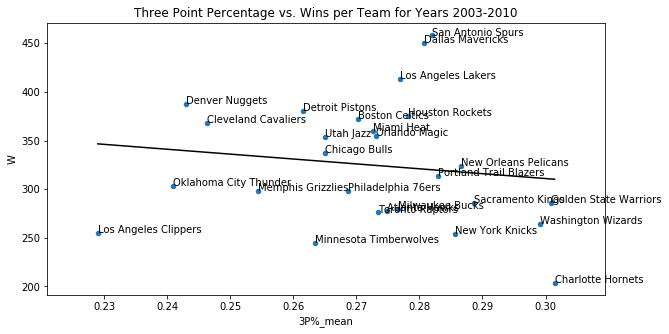

In [423]:
#2003-2010 graph
fig, ax = plt.subplots();
df3_averages.plot(ax = ax, kind = 'scatter', x = '3P%_mean', y = 'W', title= 'Three Point Percentage vs. Wins per Team for Years 2003-2010', figsize = (10, 5))

for (name, grp) in df3_averages.groupby(['Team']):
    plt.text(grp['3P%_mean'], grp['W'], str(name))

plt.plot(np.unique(df3_averages['3P%_mean']), np.poly1d(np.polyfit(x = df3_averages['3P%_mean'], y = df3_averages['W'], deg = 1))(np.unique(df3_averages['3P%_mean'])), color = 'black')

plt.show()

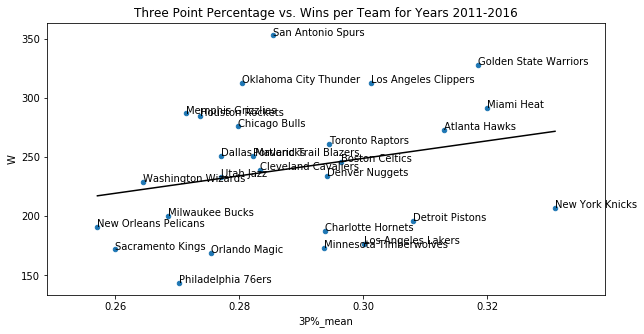

In [424]:
#2011-2016 graph
fig, ax = plt.subplots();
df4_averages.plot(ax = ax, kind = 'scatter', x = '3P%_mean', y = 'W', title= 'Three Point Percentage vs. Wins per Team for Years 2011-2016', figsize = (10, 5))

for (name, grp) in df4_averages.groupby(['Team']):
    plt.text(grp['3P%_mean'], grp['W'], str(name))

plt.plot(np.unique(df4_averages['3P%_mean']), np.poly1d(np.polyfit(x = df4_averages['3P%_mean'], y = df4_averages['W'], deg = 1))(np.unique(df4_averages['3P%_mean'])), color = 'black')

plt.show()

Our results show us that originally, there was actually an inverse correlation, as the teams that were not shooting as many 3 pointers were still successful and winning games. Perhaps they didn't want to break their original way of winning games. The majority of teams during the 80s-90s time period still had a low 3 point percentage though, so it definitly looks like not a lot of teams at that time adopted the shot. 

However, as time goes on, (with the exception of 2003-2010), it seems as though the correlation is becoming positive as time goes on. By the time we get to the years 2011-2016, the correlation is flipped and now showing a positive trend in three point percentage vs. wins.

So perhaps even though teams didn't abruptly adopt and implement the 3 point shot into their games at first, and may result to the negative correlation at the beginning of the time period, by the recent years (2011 - 2016), it seems as though the shot has been adopted and impactful to teams in terms of implementing the shot in their games and winning in the process.

### Exploring a correlation between three point attempt rate and W's

So maybe we didn't see a clear cut correlation from the first graph. Let's investigate and see if maybe just shooting more threes in general has any correlation to teams winning. 

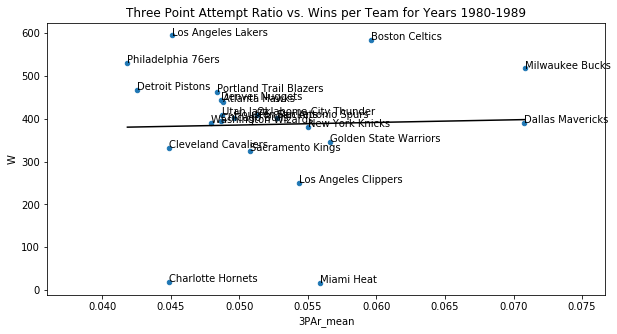

In [425]:
#1980-1989 3 point attempt ratio graph
fig, ax = plt.subplots();
df1_averages.plot(ax = ax, kind = 'scatter', x = '3PAr_mean', y = 'W', title= 'Three Point Attempt Ratio vs. Wins per Team for Years 1980-1989', figsize = (10, 5))

for (name, grp) in df1_averages.groupby(['Team']):
    plt.text(grp['3PAr_mean'], grp['W'], str(name))

plt.plot(np.unique(df1_averages['3PAr_mean']), np.poly1d(np.polyfit(x = df1_averages['3PAr_mean'], y = df1_averages['W'], deg = 1))(np.unique(df1_averages['3PAr_mean'])), color = 'black')

plt.show()

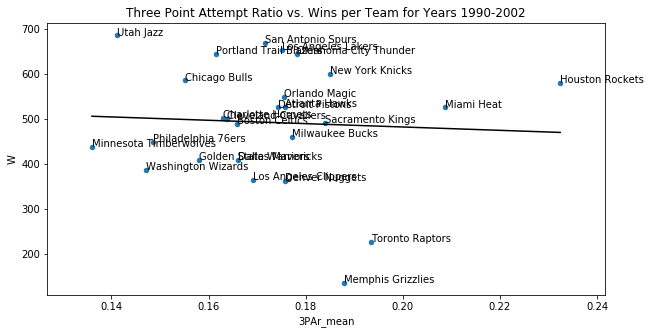

In [426]:
#1990-2002 3 point attempt ratio graph
fig, ax = plt.subplots();
df2_averages.plot(ax = ax, kind = 'scatter', x = '3PAr_mean', y = 'W', title= 'Three Point Attempt Ratio vs. Wins per Team for Years 1990-2002', figsize = (10, 5))

for (name, grp) in df2_averages.groupby(['Team']):
    plt.text(grp['3PAr_mean'], grp['W'], str(name))

plt.plot(np.unique(df2_averages['3PAr_mean']), np.poly1d(np.polyfit(x = df2_averages['3PAr_mean'], y = df2_averages['W'], deg = 1))(np.unique(df2_averages['3PAr_mean'])), color = 'black')

plt.show()

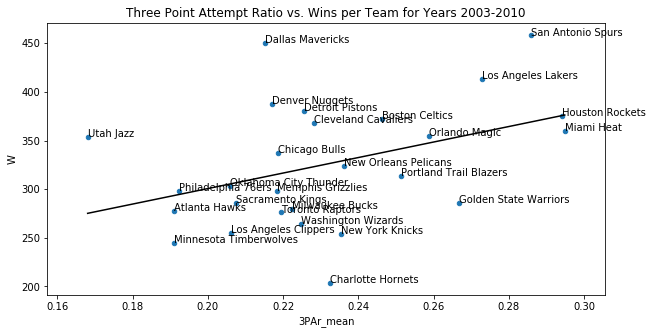

In [427]:
#2003-2010 3 point attempt ratio graph
fig, ax = plt.subplots();
df3_averages.plot(ax = ax, kind = 'scatter', x = '3PAr_mean', y = 'W', title= 'Three Point Attempt Ratio vs. Wins per Team for Years 2003-2010', figsize = (10, 5))

for (name, grp) in df3_averages.groupby(['Team']):
    plt.text(grp['3PAr_mean'], grp['W'], str(name))

plt.plot(np.unique(df3_averages['3PAr_mean']), np.poly1d(np.polyfit(x = df3_averages['3PAr_mean'], y = df3_averages['W'], deg = 1))(np.unique(df3_averages['3PAr_mean'])), color = 'black')

plt.show()

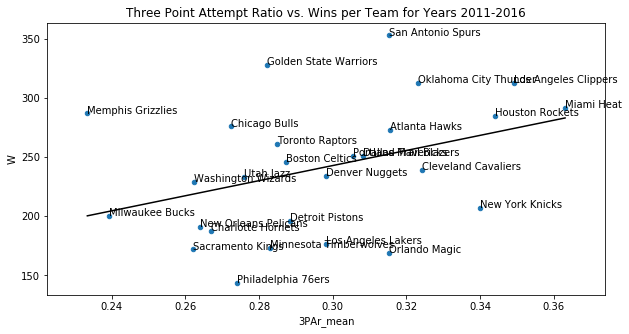

In [428]:
#2011-2016 3 point attempt ratio graph
fig, ax = plt.subplots();
df4_averages.plot(ax = ax, kind = 'scatter', x = '3PAr_mean', y = 'W', title= 'Three Point Attempt Ratio vs. Wins per Team for Years 2011-2016', figsize = (10, 5))

for (name, grp) in df4_averages.groupby(['Team']):
    plt.text(grp['3PAr_mean'], grp['W'], str(name))

plt.plot(np.unique(df4_averages['3PAr_mean']), np.poly1d(np.polyfit(x = df4_averages['3PAr_mean'], y = df4_averages['W'], deg = 1))(np.unique(df4_averages['3PAr_mean'])), color = 'black')

plt.show()

Now we can see that a positive correlation is definetly forming as the years go on from 1980 - 2016. Originally, in the 80s, there looked to be no correlation. This can definetly be attributed to the fact that just shooting more 3's during this era had no effect on winning. Perhaps teams during this era didn't adopt the shot and implement it in their game directly enough to start winning, or perhaps this era, which was dominated by big, tall, centers (players above 6' 10'') was more focused on using their physical tools to score inside the arc rather than outside. 

However, we can definetly state that as the years go on to modern times, shooting and attempting more threes has definetly had an impact on wins. Especially with the last 2 eras, we see the postive correlation forming as teams are shooting more threes, and while not necessarily making some of them, are still at least tending to win more. So the adoption of the 3 point score is happening, and for the better, as we see its impact on wins and success.

### Exploring a correlation between three point attempt rate and Offensive Rating

Since we're interested in seeing the 3 point shot's adoption and impact, we also wanted to see if there's a correlation between just shooting more threes (the attempt rate) and how many points are being produced on average (offensive rating). 

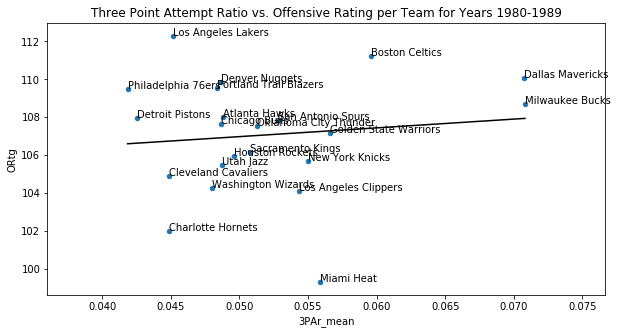

In [429]:
#1980-1989 Ortg graph
fig, ax = plt.subplots();
df1_averages.plot(ax = ax, kind = 'scatter', x = '3PAr_mean', y = 'ORtg', title= 'Three Point Attempt Ratio vs. Offensive Rating per Team for Years 1980-1989', figsize = (10, 5))

for (name, grp) in df1_averages.groupby(['Team']):
    plt.text(grp['3PAr_mean'], grp['ORtg'], str(name))

plt.plot(np.unique(df1_averages['3PAr_mean']), np.poly1d(np.polyfit(x = df1_averages['3PAr_mean'], y = df1_averages['ORtg'], deg = 1))(np.unique(df1_averages['3PAr_mean'])), color = 'black')

plt.show()

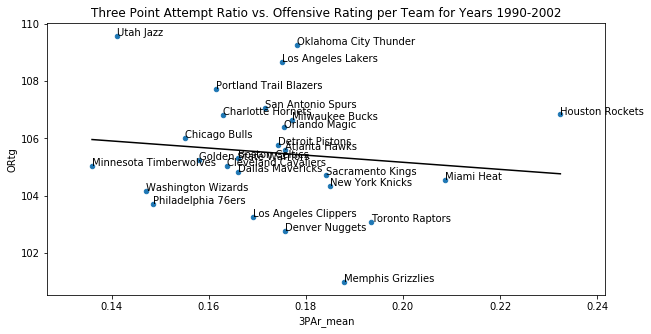

In [430]:
#1990-2002 Ortg graph
fig, ax = plt.subplots();
df2_averages.plot(ax = ax, kind = 'scatter', x = '3PAr_mean', y = 'ORtg', title= 'Three Point Attempt Ratio vs. Offensive Rating per Team for Years 1990-2002', figsize = (10, 5))

for (name, grp) in df2_averages.groupby(['Team']):
    plt.text(grp['3PAr_mean'], grp['ORtg'], str(name))

plt.plot(np.unique(df2_averages['3PAr_mean']), np.poly1d(np.polyfit(x = df2_averages['3PAr_mean'], y = df2_averages['ORtg'], deg = 1))(np.unique(df2_averages['3PAr_mean'])), color = 'black')

plt.show()

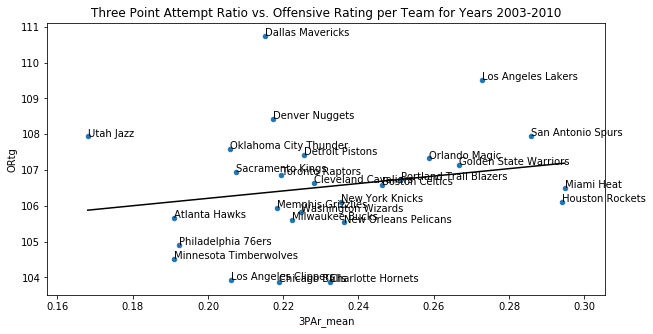

In [431]:
#2003-2010 Ortg graph
fig, ax = plt.subplots();
df3_averages.plot(ax = ax, kind = 'scatter', x = '3PAr_mean', y = 'ORtg', title= 'Three Point Attempt Ratio vs. Offensive Rating per Team for Years 2003-2010', figsize = (10, 5))

for (name, grp) in df3_averages.groupby(['Team']):
    plt.text(grp['3PAr_mean'], grp['ORtg'], str(name))

plt.plot(np.unique(df3_averages['3PAr_mean']), np.poly1d(np.polyfit(x = df3_averages['3PAr_mean'], y = df3_averages['ORtg'], deg = 1))(np.unique(df3_averages['3PAr_mean'])), color = 'black')

plt.show()

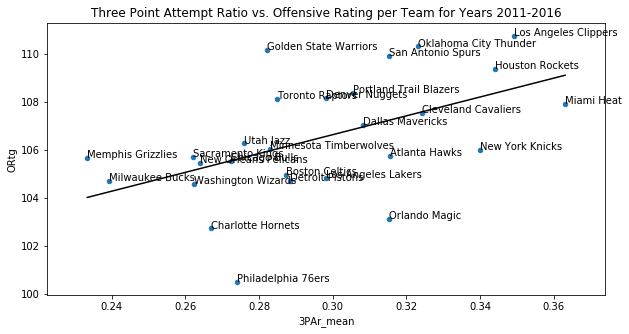

In [432]:
#2011-2016 Ortg graph
fig, ax = plt.subplots();
df4_averages.plot(ax = ax, kind = 'scatter', x = '3PAr_mean', y = 'ORtg', title= 'Three Point Attempt Ratio vs. Offensive Rating per Team for Years 2011-2016', figsize = (10, 5))

for (name, grp) in df4_averages.groupby(['Team']):
    plt.text(grp['3PAr_mean'], grp['ORtg'], str(name))

plt.plot(np.unique(df4_averages['3PAr_mean']), np.poly1d(np.polyfit(x = df4_averages['3PAr_mean'], y = df4_averages['ORtg'], deg = 1))(np.unique(df4_averages['3PAr_mean'])), color = 'black')

plt.show()

And evidently, it seems as though as the years go on, and the 3 point shot gets more widely accepted through the league as time goes on, a positive trend forms between attempting more threes and scoring production. 

We see a trend of just overall more scoring as teams attempt more threes, especially within the last two eras. This is actually really important to note, as basketball fans ourselves, scoring and just overall putting the ball in the basketball is an exciting thing to see. When the three point shot was introduced, one reason for its justification as mentioned in the introduction was to improve game attendance and viewership.

With the positive correlation of three point attempts to offensive rating, it's definetly exciting to see that the league is scoring more, and in a variety of different ways that are further away from the basket. 

### Exploring a correlation between number of 3 points scored and W's

Finally to cap it off, let's see if the number of 3 points scored by a team correlates to wins. 

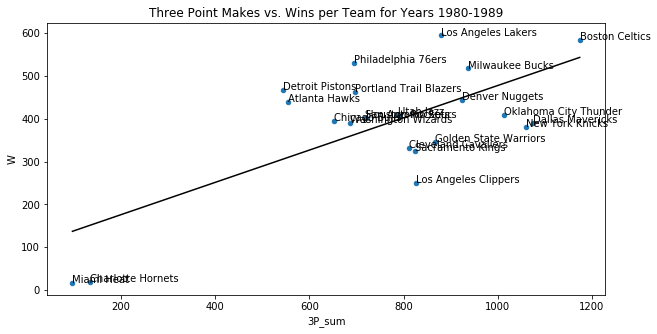

In [433]:
#1980-1989 graph
fig, ax = plt.subplots();
df1_averages.plot(ax = ax, kind = 'scatter', x = '3P_sum', y = 'W', title= 'Three Point Makes vs. Wins per Team for Years 1980-1989', figsize = (10, 5))

for (name, grp) in df1_averages.groupby(['Team']):
    plt.text(grp['3P_sum'], grp['W'], str(name))

plt.plot(np.unique(df1_averages['3P_sum']), np.poly1d(np.polyfit(x = df1_averages['3P_sum'], y = df1_averages['W'], deg = 1))(np.unique(df1_averages['3P_sum'])), color = 'black')

plt.show()

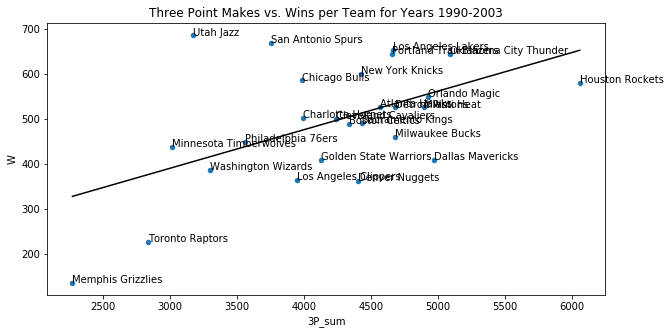

In [434]:
#1990-2003 graph
fig, ax = plt.subplots();
df2_averages.plot(ax = ax, kind = 'scatter', x = '3P_sum', y = 'W', title= 'Three Point Makes vs. Wins per Team for Years 1990-2003', figsize = (10, 5))

for (name, grp) in df2_averages.groupby(['Team']):
    plt.text(grp['3P_sum'], grp['W'], str(name))

plt.plot(np.unique(df2_averages['3P_sum']), np.poly1d(np.polyfit(x = df2_averages['3P_sum'], y = df2_averages['W'], deg = 1))(np.unique(df2_averages['3P_sum'])), color = 'black')

plt.show()

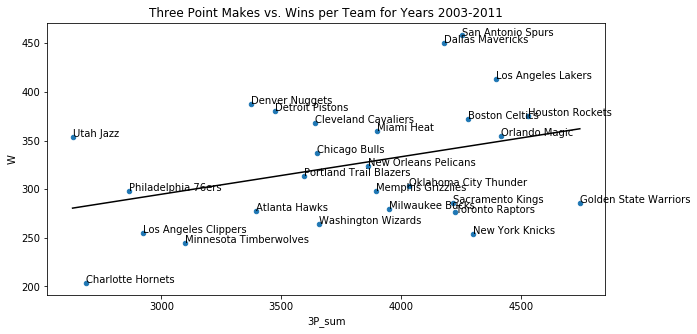

In [435]:
#2003-2011 graph
fig, ax = plt.subplots();
df3_averages.plot(ax = ax, kind = 'scatter', x = '3P_sum', y = 'W', title= 'Three Point Makes vs. Wins per Team for Years 2003-2011', figsize = (10, 5))

for (name, grp) in df3_averages.groupby(['Team']):
    plt.text(grp['3P_sum'], grp['W'], str(name))

plt.plot(np.unique(df3_averages['3P_sum']), np.poly1d(np.polyfit(x = df3_averages['3P_sum'], y = df3_averages['W'], deg = 1))(np.unique(df3_averages['3P_sum'])), color = 'black')

plt.show()

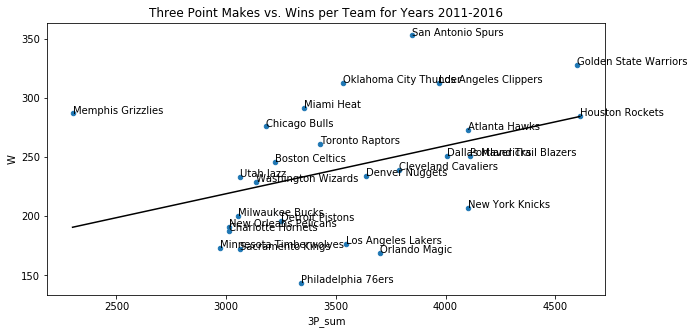

In [436]:
#2011-2016 graph
fig, ax = plt.subplots();
df4_averages.plot(ax = ax, kind = 'scatter', x = '3P_sum', y = 'W', title= 'Three Point Makes vs. Wins per Team for Years 2011-2016', figsize = (10, 5))

for (name, grp) in df4_averages.groupby(['Team']):
    plt.text(grp['3P_sum'], grp['W'], str(name))

plt.plot(np.unique(df4_averages['3P_sum']), np.poly1d(np.polyfit(x = df4_averages['3P_sum'], y = df4_averages['W'], deg = 1))(np.unique(df4_averages['3P_sum'])), color = 'black')

plt.show()

And, impressively, even though in some earlier eras a metric like the attempt rate or 3 point scoring efficiency would not lead to a postive correlation with wins, in all eras, we can definetly be postive in saying that a correlation exists with making more threes and winning.

Even though teams originally were hesitant and didn't believe in implementing the three pointer into their game and plays in 1979, we can see from this plot that the teams who did willingly shoot and make more, rather than just not shoot at all or barely do, generally had more success when it came to scoring more  and winning more (which is entertaining, popular, and exciting).

### Pie Chart to show 3 point adoption within the NBA

Finally, just to prove and solidify the notion that 3 pointers have been adopted and implemented within NBA teams' games as the years have gone, and is here to stay and keep growing, here's a pie chart to display the points scored off 3 pointers vs points scored off other (2 pointers or free throws).  

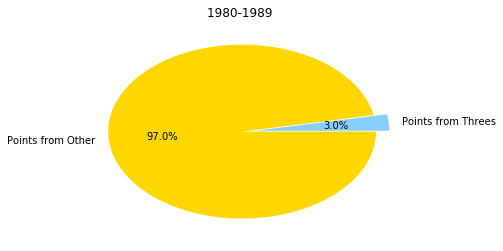

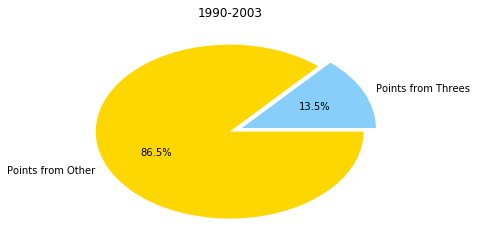

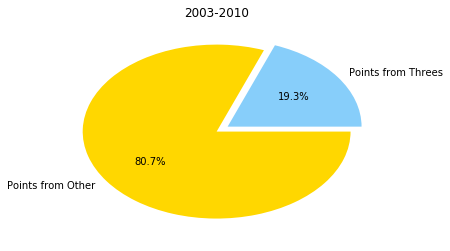

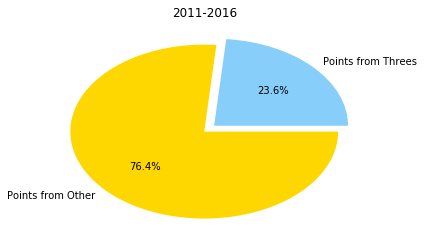

In [437]:
# Getting size of the total pie chart, with boundaries being 3 points scored
# in that specific era vs other points scored in that specific era. 

sizes1 = [df1["3PScored"].sum(), df1["OtherScored"].sum()]
sizes2 = [df2["3PScored"].sum(), df2["OtherScored"].sum()]
sizes3 = [df3["3PScored"].sum(), df3["OtherScored"].sum()]
sizes4 = [df4["3PScored"].sum(), df4["OtherScored"].sum()]

# Defining colors and dimensions to plot our pie charts.
labels = "Points from Threes", "Points from Other"
colors = ['lightskyblue', 'gold']
explode = (0.1, 0)

plt.figure(0)
ax1 = plt.pie(sizes1, explode=explode, labels = labels, colors = colors, autopct='%1.1f%%')
plt.title("1980-1989 ");

plt.figure(1)
ax2 = plt.pie(sizes2, explode=explode, labels = labels, colors = colors, autopct='%1.1f%%')
plt.title("1990-2003");


plt.figure(2)
ax3 = plt.pie(sizes3, explode=explode, labels = labels, colors = colors, autopct='%1.1f%%')
plt.title("2003-2010");


plt.figure(3)
ax4 = plt.pie(sizes4, explode=explode, labels = labels, colors = colors, autopct='%1.1f%%')
plt.title("2011-2016");

From only accounting for a whopping 3% of all points scored, to now accounting to close to (1/4)th of all points scored, we can definetly state that the 3 pointer has been adopted and has impacted the league definitely, despite original claims saying that it wouldn't do so at all. 

## <u> 4. Machine Learning / Predictive Modeling</u>

This is the Machine Learning/Predictive Modeling stage of the data lifecycle. During this stage, we will be using linear regression in order to obtain a predictive model of our data. We will be using the statsmodel.formula.api library to model our train data, and thus come up with predictions for the data that we feed it. 

To read more about the using the statsmodel.formula.api to apply linear regression, visit this here: https://www.statsmodels.org/stable/index.html

### Null Hypothesis

We are looking at the impacts of 3 different winning statistics for a team, (Number of wins, Offensive Rating, and Points Scored) to see if they have an impact on the points scored of 3 pointers. 

<b>Null Hypothesis</b>: None of the 3 different winning statistics have an impact on points scored off 3 pointers. 

To test the null hypothesis, we will perform Linear Regression on our dataset, using the Oridnary Least-Squares technique through the statsmodel.formula.api library. 

### Preparing our training data

We want to only consider winning statistics and predict points scored of threes, so we can drop some of our columns from our dataframe that we won't need for our regression model. 

In [438]:
df4 = df4.rename(index=str, columns = {"3P_sum": "ThreePSum"})
df4 = df4.rename(index=str, columns = {"3PA_sum": "ThreePAttemptSum"})
df4 = df4.rename(index=str, columns = {"3P%_mean": "ThreePercentageMean"})
df4 = df4.rename(index=str, columns = {"3PAr_mean": "ThreeRatioMean"})
df4 = df4.rename(index=str, columns = {"3PScored": "ThreePScored"})


df4 = df4.drop('L', axis=1)
df4 = df4.drop('W/L%', axis=1)
df4 = df4.drop('OtherScored', axis=1)
df4 = df4.drop('Acronym', axis=1)
df4 = df4.drop('ThreePercentageMean', axis=1)
df4 = df4.drop('ThreeRatioMean', axis=1)

df4.head()

Season                    Team   W   ORtg  ThreePSum  ThreePAttemptSum  \
740    2011     Cleveland Cavaliers  21  101.1      509.0            1489.0   
741    2011         Houston Rockets  34  105.5      677.0            1843.0   
742    2011  Portland Trail Blazers  28  105.7      518.0            1503.0   
743    2011   Golden State Warriors  23  105.4      685.0            1749.0   
744    2011    New Orleans Pelicans  21  100.9      444.0            1232.0   

     PTS_sum  ThreePScored  
740   7371.0          1527  
741   8626.0          2031  
742   7798.0          1554  
743   7607.0          2055  
744   7594.0          1332

### Creating our OLS Linear Regression model

Now we can prepare our training data and our expected predictions, and then feed that into our ols() function to get back a linear regression model to predict our data. 

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


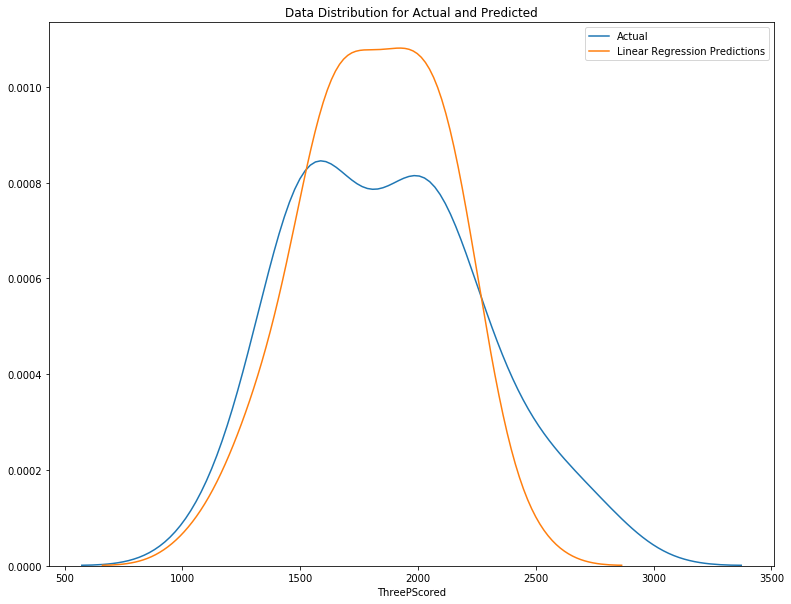

In [450]:
X = df4.drop('ThreePScored', axis=1)
y = df4['ThreePScored']


# Split data into Train and Test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.3)
X_train['ThreePScored'] = y_train

# Fit the Linear Regression on Train split
lr = smf.ols(formula='ThreePScored ~ W + ORtg + PTS_sum', data=X_train).fit()


# Predict using Test split
preds_lr = lr.predict(X_test)

# Plot how the predicted win_ratio compares to actual win ratio
f, ax = plt.subplots(figsize=(13,10))

plt.title('Data Distribution for Actual and Predicted');
sns.distplot(y_test, hist=False, label="Actual", ax=ax)
sns.distplot(preds_lr, hist=False, label="Linear Regression Predictions", ax=ax)

So we have our predicted model, utilizing wins, offensive rating, and points scored to predict points scored off 3's. Let's check the summary of our model, and check out our coefficients for our input

In [440]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ThreePScored   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     27.40
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           2.78e-13
Time:                        12:01:56   Log-Likelihood:                -818.09
No. Observations:                 113   AIC:                             1644.
Df Residuals:                     109   BIC:                             1655.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2885.7349   1480.454     -1.949      0.054   -5819.946      48.477
W              3.4736      4.394      0.791      0.431      -5.235      12.182
ORtg          22.1069     15.326      1.442      0.152      -8.268      52.482
PTS_sum        0.2877      0.038      7.490      0.000       0.212       0.364
==============================================================================
Omnibus:                        0.698   Durbin-Watson:                   2.342
Prob(Omnibus):                  0.705   Jarque-Bera (JB):                0.420
Skew:                           0.140   Prob(JB):                        0.811
Kurtosis:                       3.103   Cond. No.                     3.48e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### F-Test for Goodness to verify our model

Let's use a real metric that can be tested to show how well our model is. We'll use the F-Test for Goodness of fit. If the F-Value is greater than the calculated F-Statistic, and the P-Value is less than alpha (which is 0.05 in our case), a significant model has been produced.

Here's more information about the F-Test: https://subscription.packtpub.com/book/application_development/9781783284375/8/ch08lvl1sec124/t-test-and-f-test

This test can definetly help us know if we can reject our null hypothesis.

In [441]:
# Import F-Table to look up F-Statistic
from scipy.stats import f
from sklearn import model_selection
from sklearn import linear_model
# F-Test to evaluate goodness of fit
test = lr.f_test(np.identity(len(lr.params)))
print(' Model - Calculated F-Statistic: ' + str(f.ppf(.95,test.df_num,test.df_denom)) + \
        ' F-Value: ' + str(test.fvalue[0][0]) + ' P-Value: ' + str(test.pvalue))

 Model - Calculated F-Statistic: 2.454982840534581 F-Value: 774.4764530135549 P-Value: 4.87075413426123e-79


We have produced a significant model, as our F-Value is greater than the calculated F-Statistic, and our P-value is definitely less than 0.05. So we can definetly use our model to predict the points scored off 3 pointers.

### Rejecting of Null Hypothesis

We passed the F-Test, which shows us that we have produced a significant model. When we called .summary() look at some of the parameters of our regression model, it seems as though Offensive Rating has a major impact on the ability to predict points scored off 3 pointers, as its coefficient is significant and plays a major part in our regression model. 

We have found a coefficient of a winning statistic (ORtg) that has an impact on points scored off 3 pointers, so we can definitely reject the null hypothesis. 

## <u> 5. Insights and Policy Decisions</u>
### Insights

So our goal of this tutorial was, as mentioned earlier in our introduction:

<blockquote>In this tutorial, our goal is to look at NBA teams' data around the 3-pointer and see if we can find any insight regarding the adoption and use of 3-pointers from the moment it was introduced in 1979, as well as its ties to teams' success and scoring output. We'll see its impact in the league, and show that more than just "a gimmick."</blockquote>

With our exploratory data analysis, visualizations, and machine learning, we have shown how popular and prevalent the 3 pointer has become in the NBA. Teams are shooting and making more of them, and this has correlated to an increase in wins and offensive output. Positive correlation, especially within the last 10 years, is prevalent among 3 point attempts, makes, and efficiency.

NBA Teams have adopted, been impacted by, and found success with 3 pointers since it was first introduced in 1979, despite the original negative reaction that it faced. John MacLeod, coach of the Phoenix Suns said, “but I'm not going to set up plays for guys to bomb from 23 feet. I think that's very boring basketball.” But however now we've seen quite the opposite; NBA teams are adopting, utilizing, and implementing them in their game as much as they can, and it leads to wins and a higher offensive rating. 

It was also introduced as a way for the league to woo in their audience back, and increase in-game attendance and viewership. Currently, the NBA's league rating is the highest that it has ever been, and because of teams now scoring in more ways than just two pointers, and scoring much more because of 3's, who wouldn't tune in to watch a game?

Oh, you still wouldn't? Well here's a <a href="https://www.youtube.com/watch?v=GEMVGHoenXM">clip to change your mind</a> (by the way, this is a game winner, and look at where Steph Curry is shooting it from!): 

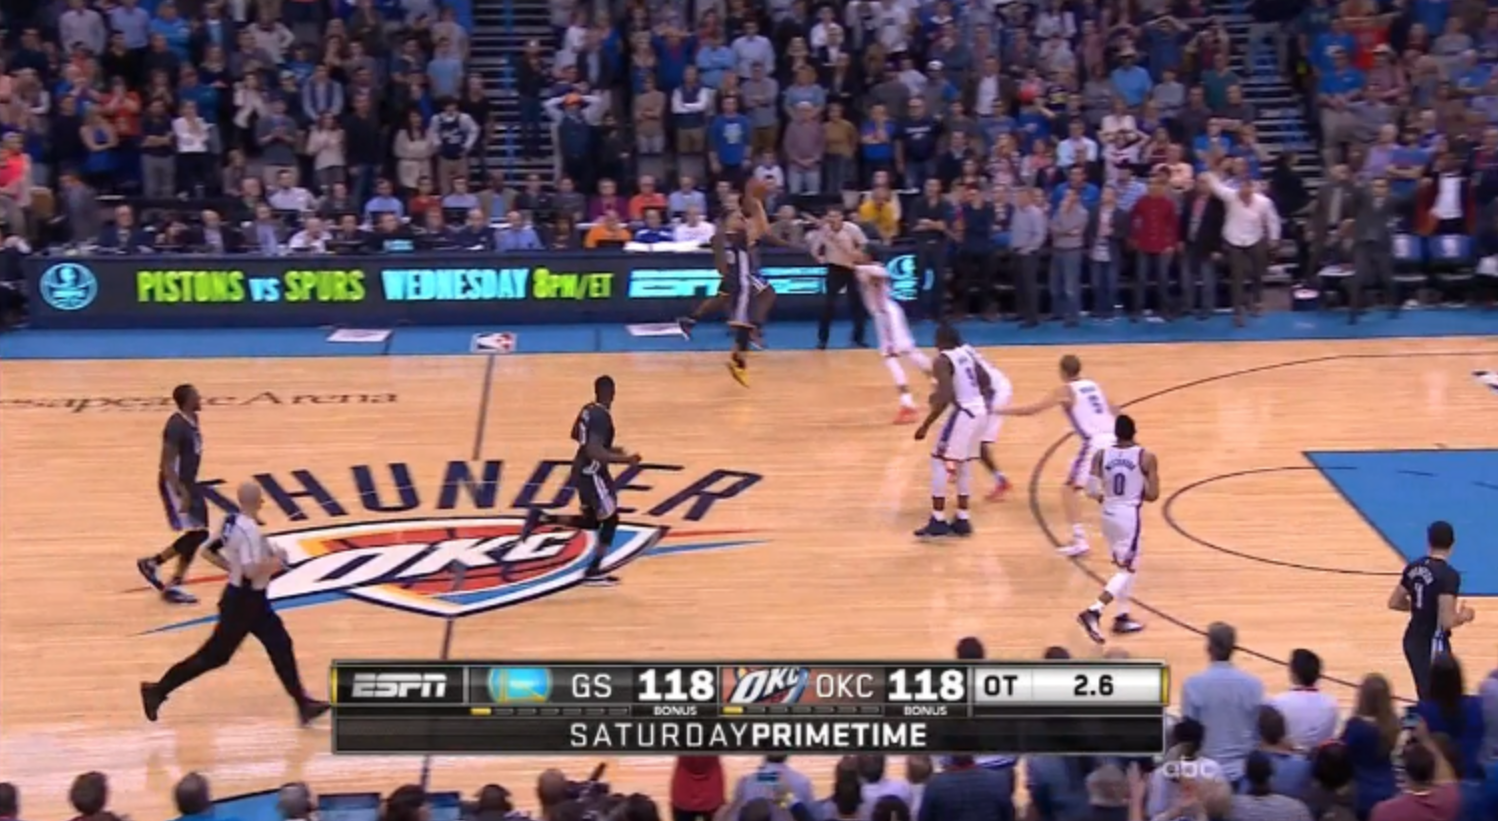

In [451]:
from IPython.core.display import Image
Image(filename='stephokc.png')

### Policy Decisions

As the prevalence of the 3 pointer in the NBA keeps increasing as times go on, I'd like to mention some crucial decisions that need to be made on how to evaluate this phenomenon. 

1. Having centers and powerforwards (tall players 6'9 and above) who can shoot 3 pointers will help teams get an edge to win. Within the last 5 years, these positions have been completely been transformed as the 3 pointer has become more prevalent, from just being told to stand under the basket and score with brute force, to now being told to stand near the 3 point arc and be ready to shoot when open. With the recent success of the reigning champions Warriors and their <a href = "https://www.washingtonpost.com/news/fancy-stats/wp/2016/05/12/no-one-can-stop-the-warriors-small-ball-lineup/?noredirect=on&utm_term=.92d5eaf20f11">small-ball lineup</a>, <b>teams need to make sure that ALL their players, regardless of what position or height, are shooting threes, because as we've seen from our analysis, there exists a correlation between 3 Point metrics and a team's success.</b>


2. And as a vice versa, being unable to shoot 3 pointers is a massive detriment to a team, so teams need to make sure that players are trained in shooting 3 pointers. I'll give a case study as an example. Ben Simmons, a point guard for the Philadelphia 76ers, is an All-Star that does not shoot 3's. The point guard position in basketball holds the ball in their hands the most. So with this, what's wrong with the image below? (Simmons is holding the ball). Because the opposite team knows Simmons can't shoot, they essentially leave him wide open, thus clogging the entire inside of the 3 point arc and clogging space. This is a detriment to the 76ers offense, and also to Simmons' reputation as a player. <b>Teams NEED to make sure that their players are able to shoot a 3 pointer confidently (and train them to do so if needed), especially when WIDE open such as in this image, as it can make a team's offense more productive and lethal.</b>

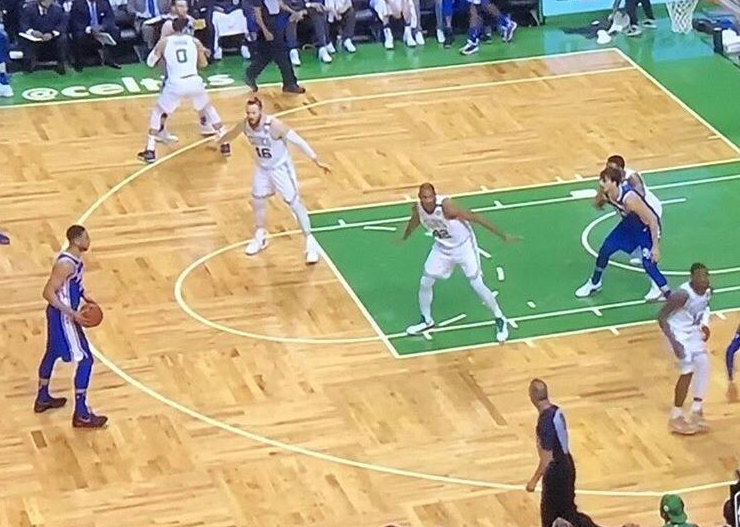

In [443]:
from IPython.core.display import Image
Image(filename='bensimmons.png')

3. We could see the NBA's 4 point line coming in soon. After everything that we've seen with the 3 pointers' blossom in the NBA, the 4 point line doesn't sound absurd at all, and can be utilzed for wins, popularity, success, basically all the points that we've shown with the current 3 point line right now. Players are already accustomed to shooting from MUCH further than the current 3 point line right now (see the clip above for proof!), so why not give teams another opportunity to score and have a chance to win?

## <u> 6. Resources</u>

### Learn more about the libraries we've used!
<ul>
    <li>Python 3.7 Installation - https://realpython.com/installing-python/</li>
    <li>Introduction to Pandas - https://towardsdatascience.com/a-quick-introduction-to-the-pandas-python-library-f1b678f34673</li>
    <li>Python NumPy Tutorial - http://cs231n.github.io/python-numpy-tutorial/</li>
    <li>Introduction to Machine Learning - https://scikit-learn.org/stable/tutorial/basic/tutorial.html</li>
    <li>Statsmodels Library Video Tutorial - https://www.youtube.com/watch?v=V86gTgL1FRw</li>
    <li>Seaborn Tutorial for Beginners -https://www.datacamp.com/community/tutorials/seaborn-python-tutorial</li>
    <li>Matplotlib pyplot tutorial -https://matplotlib.org/tutorials/introductory/pyplot.html</li>
</ul>

### Data Science topics we've covered
<ul>
    <li>Data-Wrangling - https://www.trifacta.com/data-wrangling/</li>
    <li>Tidy Data - https://www.measureevaluation.org/resources/newsroom/blogs/tidy-data-and-how-to-get-it</li>
    <li>Pandas and SQL Joins & Merging - https://www.diffen.com/difference/Inner_Join_vs_Outer_Join</li>
    <li>Exploratory Data Analysis - https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15</li>
    <li>Applying OLS Linear Regression - https://www.statsmodels.org/stable/index.html</li>
    <li>F-Tests for Goodness -https://subscription.packtpub.com/book/application_development/9781783284375/8/ch08lvl1sec124/t-test-and-f-test</li>
</ul>
    
### NBA Data Science Topics and Articles to checkout
<ul>
    <li>Explanation of Basketball Statistics - https://www.basketball-reference.com/about/glossary.html</li>
    <li>Daily, Updated, Current NBA Stats - https://stats.nba.com/</li>
    <li>Analytics supporting 4 point line- https://slate.com/culture/2016/06/the-4-point-line-could-be-coming-to-the-nba-heres-where-to-put-it.html</li>
    <li>NBA Community takes Data Science! - https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15</li>
    <li>NBA Data Analytics Hackathon - https://hackathon.nba.com/</li>
</ul>